In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline
from imutils.video import count_frames
from scipy.spatial import distance as dist

In [2]:
#%matplotlib notebook

 # Video i/p 

In [3]:
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/Export_2019-12-18_181852/0 - 2019-12-18 17-56-37-496.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/New Slab/Export_2019-12-19_124059/0 - 2019-12-19 07-01-00-394.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/day-4 data/0 - 2019-12-19 19-35-05-273.mov")

cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/data from tata - 3/0 - 2020-01-01 19-38-00-034.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

3000.0

In [4]:
cap.set(cv2.CAP_PROP_POS_FRAMES,1000)

True

In [5]:
#%matplotlib notebook

(1080, 1920, 3)


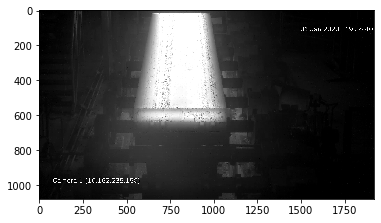

In [6]:
ret, frame = cap.read()
imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
#frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
plt.imshow(frame)

In [7]:
#%matplotlib notebook

# pixels Per Metric

In [8]:
#alar = [682,708,1095,685]
alar = [510-9,800,1126-9,800]

In [9]:
#drawLine = frame.copy()

dB = dist.euclidean(alar[:2],alar[-2:])
pixelsPerMetric = dB / 1690
print(1/pixelsPerMetric,"<<<<<-----------------MM per Pix")


2.7435064935064934 <<<<<-----------------MM per Pix


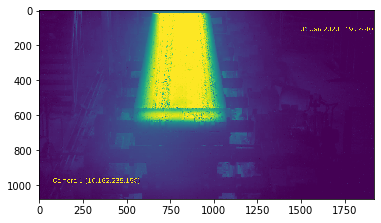

In [10]:
img = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img.copy()) 
hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv)
yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
y,u,vb = cv2.split(yuv)


hls = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HLS)
h,l,ss = cv2.split(hls)

#dst = cv2.addWeighted(y, .75, r, .601, 0.0)
dst = cv2.addWeighted(y, 1.2, r, 1.2, 0.0)

plt.imshow(l)

In [11]:
leftCor = []
rightCor = []
while(True):
    ret, img = cap.read()
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    r,g,b = cv2.split(img.copy()) 
    hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
    y,u,vb = cv2.split(yuv)
    
    #dst = cv2.addWeighted(y, .75, r, .601, 0.0)
    #dst = cv2.addWeighted(y, .75, r, .751, 0.0)
    dst = cv2.addWeighted(v, .95, r, 1.21, 0.0)
    
    blur = cv2.GaussianBlur(dst,(3,3),0)
    
    #_,thresh = cv2.threshold(blur,110,255,cv2.THRESH_BINARY)
    _,thresh = cv2.threshold(blur,170,255,cv2.THRESH_BINARY) 
    #thresh = cv2.adaptiveThreshold(dst.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,501,-13)

    
    _ , contours, hierarchy =   cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)
    # cntr Order
    ordr = 0
    epsilon = 0.0001*cv2.arcLength(cnts[0],True)
    approx = cv2.approxPolyDP(cnts[0],epsilon,True)
    dstCnt = cv2.drawContours(img.copy(),[approx],ordr,(255),2)
    val = 816
    
    
    #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
    if np.count_nonzero(thresh[val,]) >= 500:
        leftSide = np.nonzero(thresh[val,])[0][0] 
        rightSide = np.nonzero(thresh[val,])[0][-1]
        leftCor.append(leftSide)
        rightCor.append(rightSide)
        #print(np.count_nonzero(thresh[816,]))
        mmPpix = ((1/pixelsPerMetric)* (rightSide - leftSide)) 
        print(mmPpix)
        print("leftSide = ",leftSide,"rightSide = ", rightSide)
        print(blur[val,][leftSide :rightSide ])
        
        img  = cv2.line(img ,(np.nonzero(thresh[val,])[0][0] ,alar[1]),((np.nonzero(thresh[val,])[0][-1]),alar[3]),(0,255,0),2)
        
        #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
        
        img = cv2.circle(img,(leftSide,alar[1]) , 1, 0, 5)
        img = cv2.circle(img,(rightSide,alar[3]) , 1, 0, 5)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.putText(img,"{} mm".format(mmPpix),(0,330), font, 1.2, (200,255,155), 2, cv2.LINE_AA)

    
    img1 = cv2.resize(img ,(900,500))
    img2 = cv2.resize(dstCnt,(500,300))
    img3 = cv2.resize(thresh,(500,300))
    cv2.imshow('img ',img)
    #cv2.imshow('img ',img1)
    #cv2.imshow('img ',img3)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

1519.9025974025974
leftSide =  525 rightSide =  1079
[175 181 170 161 166 164 152 152 154 148 143 150 166 178 184 189 195 201
 205 205 204 204 208 215 221 220 206 199 213 225 221 215 218 228 232 231
 232 229 223 226 233 232 225 227 241 249 249 249 243 229 220 230 245 248
 248 251 254 253 247 239 242 250 255 254 246 234 235 248 255 255 253 251
 252 250 243 238 241 245 245 242 235 237 236 223 221 220 218 226 237 242
 241 236 231 226 222 217 221 222 215 218 236 249 251 244 234 226 231 247
 255 255 255 255 255 255 255 255 255 255 255 255 254 252 254 255 255 255
 255 255 254 253 254 255 255 254 255 255 255 255 255 255 255 255 255 255
 255 255 254 251 251 253 255 255 255 255 255 255 254 252 251 253 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 254 253 251 249 248 248 250 252 254 254 254 253
 254 254 253 250 251 253 253 251 250 250 251 252 253 253 254 254 254 253
 254 253 251 251 249 242 240 245 251 254 255 255 255 255 255 254 253 25

1602.2077922077922
leftSide =  511 rightSide =  1095
[171 173 175 176 177 179 184 188 190 190 190 190 192 198 205 210 211 210
 210 212 216 219 217 215 216 219 220 221 221 219 217 219 227 237 239 240
 243 247 249 249 248 245 244 248 252 254 255 255 255 253 248 244 248 253
 254 254 252 248 247 251 248 245 250 254 255 255 255 255 255 255 254 255
 255 255 255 255 255 255 254 252 254 255 255 255 254 251 251 254 255 255
 255 255 254 250 248 250 253 255 255 255 255 255 255 255 255 255 255 247
 223 209 225 248 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 253 252 254 255 253 242 232 241 252 254 254 255 255
 255 255 255 255 254 248 242 247 252 254 255 255 254 253 253 248 239 238
 242 235 230 242 252 254 253 250 245 244 248 250 252 255 255 255 255 255
 255 255 255 255 254 252 254 255 255 255 255 255 255 255 255 255 253 250
 252 255 255 255 255 249 239 238 241 243 243 240 242 247 243 232 228 232
 233 229 225 221 227 233 234 245 254 255 255 255 255 255 255 246 232 23

1637.8733766233765
leftSide =  507 rightSide =  1104
[171 173 176 179 182 182 181 183 190 198 201 202 202 204 206 208 209 210
 213 218 222 225 228 231 235 238 230 215 218 238 249 242 229 228 239 250
 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 253 250 252 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 254 251 250 253 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 254 254 255 255 255 255 255 255 255 255 255 255 255 25

1646.103896103896
leftSide =  505 rightSide =  1105
[179 186 189 189 188 188 189 194 201 206 206 204 203 203 208 215 217 214
 217 228 240 247 250 251 250 249 249 250 253 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 253
 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 248 241 248 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 252 248 251 254 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 252 248 252 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255

1662.564935064935
leftSide =  503 rightSide =  1109
[176 184 189 190 190 190 193 200 207 214 222 224 224 222 219 214 213 222
 232 233 232 239 248 253 255 255 253 252 253 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255

1676.2824675324675
leftSide =  500 rightSide =  1111
[177 185 188 189 190 191 194 200 205 206 205 205 206 211 211 208 209 216
 221 224 226 230 232 232 238 246 249 249 246 246 247 249 253 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 25

1679.025974025974
leftSide =  499 rightSide =  1111
[178 184 188 189 190 190 194 201 202 199 193 177 167 174 179 180 185 192
 203 213 215 208 200 195 198 218 242 248 245 247 251 254 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255

1681.7694805194806
leftSide =  496 rightSide =  1109
[172 174 175 177 180 184 186 187 188 190 192 194 197 199 201 203 205 204
 201 200 203 205 205 205 203 202 192 174 172 181 185 192 200 204 212 224
 234 236 236 238 240 240 240 240 239 238 239 248 254 255 255 250 236 222
 216 214 218 229 242 250 254 254 255 255 255 255 254 253 254 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 25

1679.025974025974
leftSide =  496 rightSide =  1108
[171 173 176 177 179 182 185 186 188 190 192 193 194 195 197 200 201 202
 203 203 204 205 206 207 208 212 215 217 216 216 218 219 216 216 220 223
 224 225 226 228 232 237 240 243 247 250 252 254 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 254 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255

1700.9740259740258
leftSide =  493 rightSide =  1113
[173 176 180 184 187 191 193 197 200 200 203 208 211 214 217 219 219 222
 225 227 225 218 229 246 251 252 252 251 249 248 250 254 255 255 255 255
 255 255 254 253 253 253 254 253 248 244 245 251 255 255 255 255 255 255
 254 252 252 253 255 255 255 255 252 248 252 254 253 252 252 253 254 255
 254 253 253 254 255 255 255 255 255 255 255 253 248 243 244 251 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 252
 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 253 249 243
 240 248 252 245 240 245 250 254 255 255 255 254 246 238 242 250 254 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 253 250 249 251 253 254 255 253 252 251
 253 253 254 254 248 242 244 249 252 254 255 255 255 249 240 238 239 238
 240 247 250 253 255 255 255 255 255 255 255 255 255 255 255 255 255 25

1711.948051948052
leftSide =  493 rightSide =  1117
[173 176 177 179 183 190 195 196 197 200 202 203 204 205 207 209 216 223
 227 229 232 227 222 231 238 239 244 249 251 251 253 254 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 254 252 253 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 254 252 254 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 254 253 254 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255

1709.2045454545455
leftSide =  493 rightSide =  1116
[173 175 177 179 183 187 189 191 194 197 200 202 204 206 208 211 215 218
 221 223 225 227 226 226 228 234 239 243 246 247 248 251 254 254 254 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 250 244 250 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 25

1706.4610389610389
leftSide =  492 rightSide =  1114
[171 174 176 178 180 183 186 187 189 190 192 194 196 199 202 205 207 210
 212 214 216 219 221 224 226 229 231 232 233 236 241 245 247 248 249 250
 251 252 254 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 251 247 251 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 254 251 251 250 249 251 254 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 252 250 252 254 255 25

In [12]:
leftCor = np.array(leftCor)
rightCor = np.array(rightCor)

In [13]:
leftCor.max()

525

In [14]:
leftCor.min()

492

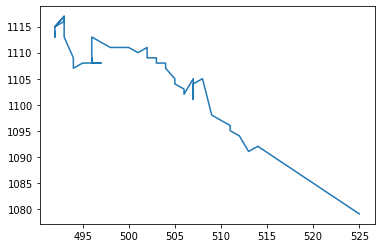

In [15]:
plt.plot(leftCor,rightCor)

In [16]:
data = np.vstack((leftCor,rightCor))

In [17]:
data

array([[ 525,  514,  513,  512,  511,  511,  509,  508,  507,  507,  507,
         506,  506,  505,  505,  504,  504,  503,  503,  503,  503,  502,
         502,  501,  500,  500,  499,  499,  499,  498,  497,  496,  496,
         496,  496,  496,  496,  496,  496,  497,  495,  494,  494,  494,
         493,  493,  493,  493,  492,  492,  492,  493,  493,  493,  493,
         493,  493,  493,  493,  493,  492,  492,  492,  492,  492,  492],
       [1079, 1092, 1091, 1094, 1095, 1096, 1098, 1105, 1104, 1101, 1105,
        1102, 1103, 1104, 1105, 1107, 1108, 1108, 1108, 1109, 1109, 1109,
        1111, 1110, 1111, 1111, 1111, 1111, 1111, 1111, 1112, 1113, 1113,
        1108, 1109, 1108, 1108, 1108, 1108, 1108, 1108, 1107, 1108, 1109,
        1113, 1116, 1117, 1117, 1115, 1115, 1115, 1117, 1117, 1117, 1117,
        1117, 1116, 1116, 1116, 1116, 1115, 1113, 1113, 1114, 1114, 1114]],
      dtype=int64)

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame(data.T)

In [20]:
df

,0,1
0,525,1079
1,514,1092
2,513,1091
3,512,1094
4,511,1095
...,...,...
61,492,1113
62,492,1113
63,492,1114
64,492,1114


In [21]:
df[0].unique()

array([525, 514, 513, 512, 511, 509, 508, 507, 506, 505, 504, 503, 502,
       501, 500, 499, 498, 497, 496, 495, 494, 493, 492], dtype=int64)

In [22]:
df[1].unique()

array([1079, 1092, 1091, 1094, 1095, 1096, 1098, 1105, 1104, 1101, 1102,
       1103, 1107, 1108, 1109, 1111, 1110, 1112, 1113, 1116, 1117, 1115,
       1114], dtype=int64)

In [23]:
df[0].max() - df[0].min()

33

In [24]:
df[1].max() - df[1].min()

38